In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


In [184]:
data = pd. read_csv('/content/train-chennai-sale.csv')

In [185]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [186]:
 ## checking number of columns and row 
 print(data.shape)

 print(data.columns)

(7109, 22)
Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')


## DROPED PAR_ID , REG_FEE , COMMIS COLUMNS 

In [187]:
## DRIOPING AD ID COLUMN
data = data.drop(['PRT_ID'], axis=1)

In [188]:
## HERE WE ADD REG_FEE , COMMIS , SALES_PRICE= TOTAL SALES_PRICE
data['TOTAL_SALES_PRICE'] = data['REG_FEE'] + data['COMMIS'] + data['SALES_PRICE']

In [189]:
data.shape

(7109, 22)

In [190]:
## checking null vlues
data.isnull().sum()

AREA                  0
INT_SQFT              0
DATE_SALE             0
DIST_MAINROAD         0
N_BEDROOM             1
N_BATHROOM            5
N_ROOM                0
SALE_COND             0
PARK_FACIL            0
DATE_BUILD            0
BUILDTYPE             0
UTILITY_AVAIL         0
STREET                0
MZZONE                0
QS_ROOMS              0
QS_BATHROOM           0
QS_BEDROOM            0
QS_OVERALL           48
REG_FEE               0
COMMIS                0
SALES_PRICE           0
TOTAL_SALES_PRICE     0
dtype: int64

In [191]:
## checking data type 
data.dtypes

AREA                  object
INT_SQFT               int64
DATE_SALE             object
DIST_MAINROAD          int64
N_BEDROOM            float64
N_BATHROOM           float64
N_ROOM                 int64
SALE_COND             object
PARK_FACIL            object
DATE_BUILD            object
BUILDTYPE             object
UTILITY_AVAIL         object
STREET                object
MZZONE                object
QS_ROOMS             float64
QS_BATHROOM          float64
QS_BEDROOM           float64
QS_OVERALL           float64
REG_FEE                int64
COMMIS                 int64
SALES_PRICE            int64
TOTAL_SALES_PRICE      int64
dtype: object

# **SPELLING CORECTION FOR CATEGORICAL FEATUREES** 

In [192]:
## checking splling in area column   ## Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet'KK Nagar', 'TNagar
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [193]:
data.AREA= data['AREA'].str.strip()

In [194]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [195]:
data['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [196]:
##SALE_COND COLUMN
data.SALE_COND.unique()


array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [197]:
data['SALE_COND'].replace(['Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [198]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [199]:
data['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [200]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [201]:
data['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewa','AllPub'],inplace=True)
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewa'], dtype=object)

In [202]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [203]:
data['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [204]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [205]:
data['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [206]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [207]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,TOTAL_SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,10063653
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,7717313


## **FILLING NULL VALUES TO MISSING COLUMNS**

In [208]:
data.isnull().sum()

AREA                  0
INT_SQFT              0
DATE_SALE             0
DIST_MAINROAD         0
N_BEDROOM             1
N_BATHROOM            5
N_ROOM                0
SALE_COND             0
PARK_FACIL            0
DATE_BUILD            0
BUILDTYPE             0
UTILITY_AVAIL         0
STREET                0
MZZONE                0
QS_ROOMS              0
QS_BATHROOM           0
QS_BEDROOM            0
QS_OVERALL           48
REG_FEE               0
COMMIS                0
SALES_PRICE           0
TOTAL_SALES_PRICE     0
dtype: int64

In [209]:
##N_BEDROOM  1  null values
#N_BATHROOM  5
#QS_OVERALL 48

In [210]:
data['N_BEDROOM'] = data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])

In [211]:
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])

In [212]:
data['QS_OVERALL'] = data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [213]:
## null value are fill with there mean values
data.isnull().sum()

AREA                 0
INT_SQFT             0
DATE_SALE            0
DIST_MAINROAD        0
N_BEDROOM            0
N_BATHROOM           0
N_ROOM               0
SALE_COND            0
PARK_FACIL           0
DATE_BUILD           0
BUILDTYPE            0
UTILITY_AVAIL        0
STREET               0
MZZONE               0
QS_ROOMS             0
QS_BATHROOM          0
QS_BEDROOM           0
QS_OVERALL           0
REG_FEE              0
COMMIS               0
SALES_PRICE          0
TOTAL_SALES_PRICE    0
dtype: int64

## now we want change the catgorical values to numerical values 

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               7109 non-null   object 
 1   INT_SQFT           7109 non-null   int64  
 2   DATE_SALE          7109 non-null   object 
 3   DIST_MAINROAD      7109 non-null   int64  
 4   N_BEDROOM          7109 non-null   float64
 5   N_BATHROOM         7109 non-null   float64
 6   N_ROOM             7109 non-null   int64  
 7   SALE_COND          7109 non-null   object 
 8   PARK_FACIL         7109 non-null   object 
 9   DATE_BUILD         7109 non-null   object 
 10  BUILDTYPE          7109 non-null   object 
 11  UTILITY_AVAIL      7109 non-null   object 
 12  STREET             7109 non-null   object 
 13  MZZONE             7109 non-null   object 
 14  QS_ROOMS           7109 non-null   float64
 15  QS_BATHROOM        7109 non-null   float64
 16  QS_BEDROOM         7109 

In [215]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,TOTAL_SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,1.141285e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06,3.944957e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,2.253935e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,8.645792e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07,1.081953e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07,1.361393e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,2.496904e+07


In [216]:
## there is 9 object columnes to chnage
# take data_build and date _sales columns
import datetime as dt
data['DATE_BUILD'] =pd.to_datetime(data['DATE_BUILD'])
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])



In [217]:
## create new colum and add age of house by calculat data_build and data_sale OF YEARS
data['BUILD_YEARS'] = data['DATE_BUILD'].dt.year
data['SOLD_YEARS'] = data['DATE_SALE'].dt.year

data['AGE_OF_HOUSE'] =data['SOLD_YEARS']-data['BUILD_YEARS']
data.AGE_OF_HOUSE

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_HOUSE, Length: 7109, dtype: int64

In [218]:
## NOW MERG THE AGE_OF_HOUSE IN COLUMN ADDED AND DROP DATE_BUILD AND DATE_SALE COLUMN
data.drop(['DATE_BUILD','DATE_SALE','REG_FEE','COMMIS','SALES_PRICE'],axis=1,inplace=True)

In [219]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_SALES_PRICE,BUILD_YEARS,SOLD_YEARS,AGE_OF_HOUSE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,1967,2011,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,1995,2006,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,1992,2012,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,10063653,1988,2010,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,1979,2009,30


In [220]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_SALES_PRICE,BUILD_YEARS,SOLD_YEARS,AGE_OF_HOUSE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7109.000000,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,1.141285e+07,1985.491912,2009.768181,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.944957e+06,12.648859,2.205979,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.253935e+06,1949.000000,2004.000000,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.645792e+06,1976.000000,2008.000000,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,1.081953e+07,1986.000000,2010.000000,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.361393e+07,1996.000000,2011.000000,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.496904e+07,2010.000000,2015.000000,55.000000


In [221]:
data.shape

(7109, 20)

##**DATA VISUALISATION**

In [222]:
# DATA VISUALISATION BY USING matplotlib and seaborn to see DISTRIBUTION OF THE DATA.


In [223]:
## BY GROUP IN COLUMN AND USING COUNT FUNCTION WE CAN SEE NUMBER OF VALUES CAN VISUZLISATIONZ
## BY THE AREA WE CAN SEE HOW MANY HOUSE HAVE  TYPE OF STREET ARE THERE BY THAT WE CAN SEE WHAT ARE FACILITIES ARE THERE IN AREA
a1=data['AREA'].groupby(data['STREET']).count()
a1.head()

STREET
Gravel       2520
No Access    2017
Paved        2572
Name: AREA, dtype: int64

In [224]:
a2= data['AREA'].groupby(data['PARK_FACIL']).count()
a3=data['AREA'].groupby(data['BUILDTYPE']).count()
a4 = data['AREA'].groupby(data['MZZONE']).count()
a5= data['AREA'].groupby(data['UTILITY_AVAIL']).count()
a6 = data['AREA'].groupby(data['AREA']).count()

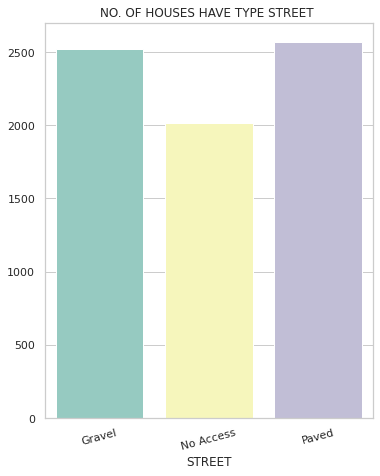

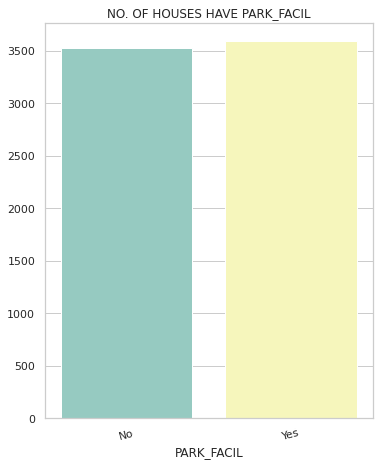

In [225]:
## a1 NUMBER OF HOUSE HAVE STREET
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES HAVE TYPE STREET ')
sns.barplot(x=a1.index,y=a1.values,data=data,palette="Set3")
## A2 NUMBER OF HOUSE HAVE PARK_FACIK
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES HAVE PARK_FACIL')
sns.barplot(x=a2.index,y=a2.values,data=data,color='pink',palette="Set3")
plt.show()


# FROM THE VISUZISATION

1. **NUMBER OF HOUSES HAVE TYPE STREET**-FROM 7109 HOUSE HAS HIGH NUMBER OF Gravel  AND LEAST IS NO ACCESS .
 

2.**NUMBER OF HOUSES HAVE PARK_FACIL**- FROM THE PLOT WE CAN SAW 50% HOUSE HAVE PARK AND ANOTHER 50% HOUSE DONT HAVE PARK
    
   



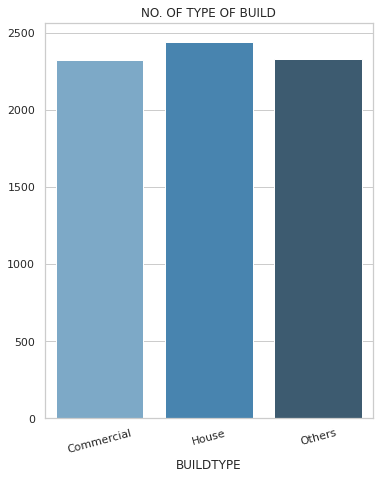

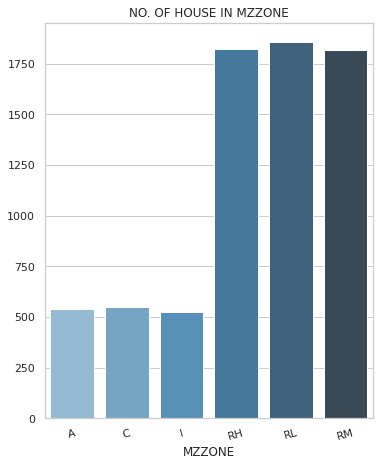

In [226]:
## A3 HAS NUMBER OF HOUSE ARE TYPE OF BUILD
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF TYPE OF BUILD')
sns.barplot(x=a3.index,y=a3.values,data=data, palette="Blues_d")
# A4 HAS NUMBER OF HOUSE ARE MZZONE
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSE IN MZZONE')
sns.barplot(x=a4.index,y=a4.values,data=data, palette="Blues_d")


# FROM THE VISUZISATION

1. **NUMBER OF  TYPE OF BUILD** -- COMPAR TO THREE TYPES OF BUILDING MAJOR HAS HOUSE AFTER THAT WE HAVE COMMERICAL BUILDING

2.**NUMBER OF HOUSE IN MZZONE** -- FROM 7109 HOUSE MAJOR HOUSE IN RESDENICALY (HIGH, LOW,MEDIUM) WE HAVE AND ( A,C I ) HAVE MINIMUM HOUSE(LESS THAN 650)

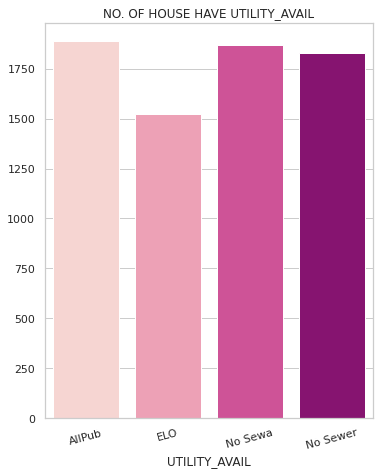

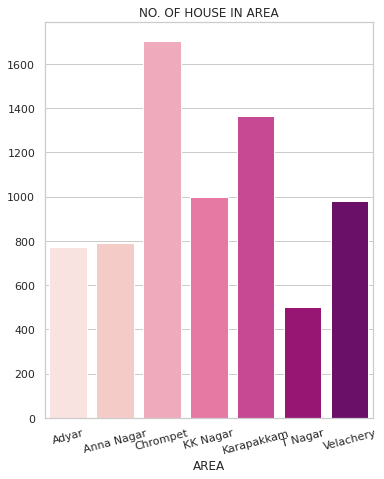

In [227]:
## A5 HAS NUMBER OF HOUSE HAVE UTILITY AVAILABIL
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSE HAVE UTILITY_AVAIL')
sns.barplot(x=a5.index,y=a5.values,data=data, palette="RdPu")
# A6 HAS NUMBER OF HOUSE ARE MZZONE
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSE IN AREA')
sns.barplot(x=a6.index,y=a6.values,data=data, palette="RdPu")


# FROM THE VISUZISATION

1. **NUMBER OF HOUSE HAVE UTILITY_AVAIL**-- FROM 7109 OF HOUSE MORE THAN (1750) HAVE ALLPUB, ELO, NO SEWA , NO SEWER  AND COMPARE TO THIS ELO LEES

2.**NUMBER OF HOUSE IN AREA**-- HIGH NUMBER OF IN CHROMPET FROM THAT KARAPAKKAM(MORE THAN 1250 HOUSE) FROM THAT KK NAGAR (1000 NO.HOUSE)
ADYAR AND ANNA NAGAR HAS (MORE THAN 750 HOUSE) AND T NAGAR HAS LESS NUMBER OF HOUSE( LESS THAN 600 )

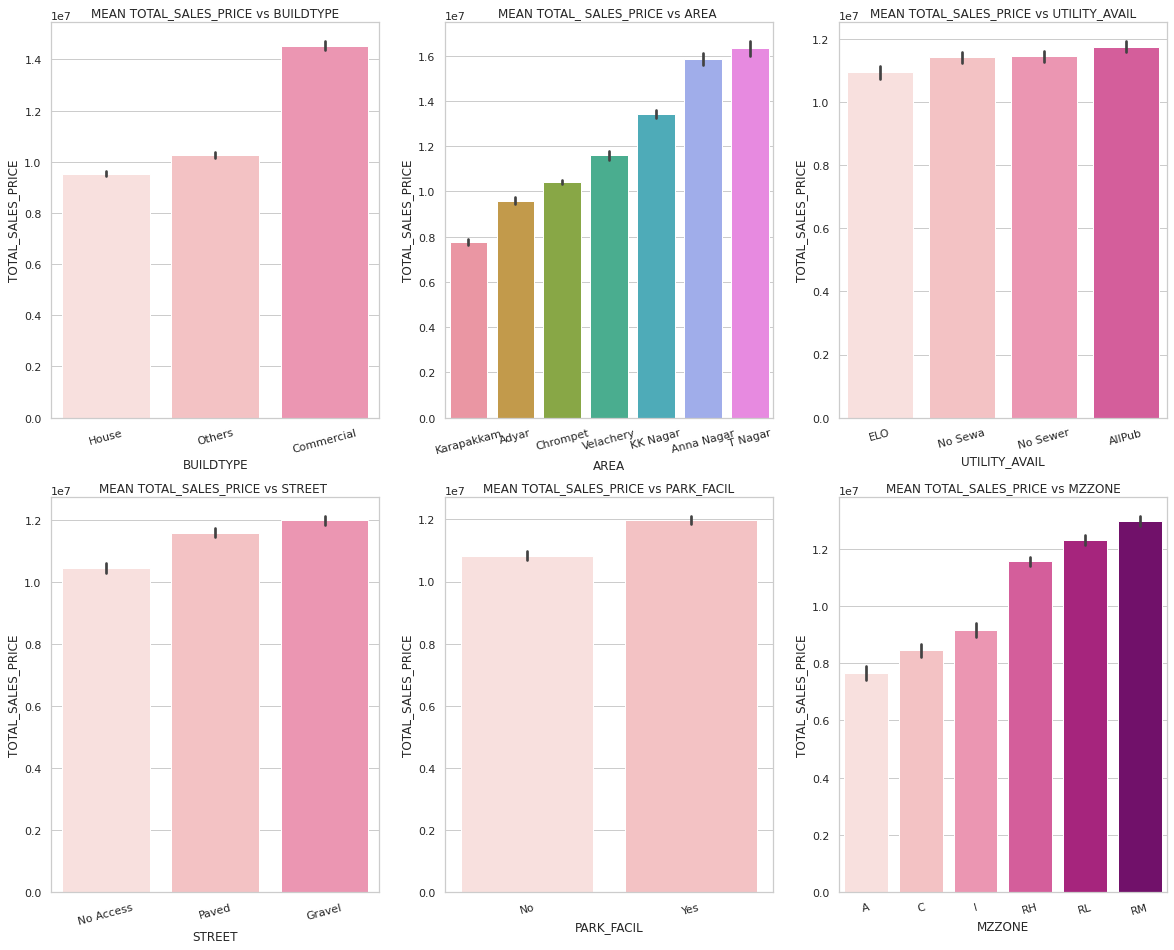

In [228]:
## FROM THIS VISUZISATION WE CAN ARANGE THE FOLLOWING FEATURE TO ENCONDING

sns.set_theme(style="whitegrid", palette="RdPu",)
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='BUILDTYPE',y='TOTAL_SALES_PRICE',data=data,order=data.groupby('BUILDTYPE')['TOTAL_SALES_PRICE'].mean().reset_index().sort_values('TOTAL_SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALES_PRICE vs BUILDTYPE')
plt.subplot(232)
sns.barplot(x='AREA',y='TOTAL_SALES_PRICE',data=data,order=data.groupby('AREA')['TOTAL_SALES_PRICE'].mean().reset_index().sort_values('TOTAL_SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_ SALES_PRICE vs AREA ')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='TOTAL_SALES_PRICE',data=data,order=data.groupby('UTILITY_AVAIL')['TOTAL_SALES_PRICE'].mean().reset_index().sort_values('TOTAL_SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALES_PRICE vs UTILITY_AVAIL')
plt.subplot(234)
sns.barplot(x='STREET',y='TOTAL_SALES_PRICE',data=data,order=data.groupby('STREET')['TOTAL_SALES_PRICE'].mean().reset_index().sort_values('TOTAL_SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALES_PRICE vs STREET ')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='TOTAL_SALES_PRICE',data=data,order=data.groupby('PARK_FACIL')['TOTAL_SALES_PRICE'].mean().reset_index().sort_values('TOTAL_SALES_PRICE')['PARK_FACIL'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALES_PRICE vs PARK_FACIL')
plt.subplot(236)
sns.barplot(x='MZZONE',y='TOTAL_SALES_PRICE',data=data,order=data.groupby('MZZONE')['TOTAL_SALES_PRICE'].mean().reset_index().sort_values('TOTAL_SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALES_PRICE vs MZZONE')
plt.show()

# FROM THE VISUZISATION 

1.**TOTAL_SALES_PRICE vs BUILDTYPE** -- COMMERICAL BUILDING IS HIGH SALES PRICES FOLLOWED OTHER TYPE BUILING AND LAST COUNT HAS HOUSE

2.**TOTAL_ SALES_PRICE vs AREA** -- T ANGAR AND ANNA NAGAR HAS HIGH SALES PRICE AND FROM THAT KK ANGAR AND VELACHERY FOLLOWED BY THAT CHROMPET AND ADYAR AND THE LEST SALES PRICES COMPAR TO THIS AREA KARAPAKKAM HAS LESS SLAE PRICES AREA


**UTILITY_AVAIL**  - MAJOR ALL UTILYT AVAILABLE FOR ALL AREA


. AllPub All public Utilities (E,G,W,& S)

. NoSewr Electricity, Gas, and Water (Septic Tank)

. NoSeWa Electricity and Gas Only

. ELO Electricity only

** MZZONE ** - RM IS HIGH COMPARE TO ALL AND RL , RH FOLLOEWD BY RM AND C AND I LOW TO COMPARE TO RESIDENCY ARE A LEAST IS AGRICULTURE PRICES IS LESS

. A = AGRICULTURE LAND

. C = COMMERICAL LAND

. IN = INDUSTRIAL LAND

. RH = RESIDENTIAL HIGH

. RL= RESIDENTICAL LOW

. RM= RESIDENTICAL MEDIUM

FROM THIS PLOT WE CAN DO ENODING 

# REALTION BETWEEN TARGET VARIABLE

In [229]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'TOTAL_SALES_PRICE', 'BUILD_YEARS', 'SOLD_YEARS',
       'AGE_OF_HOUSE'],
      dtype='object')

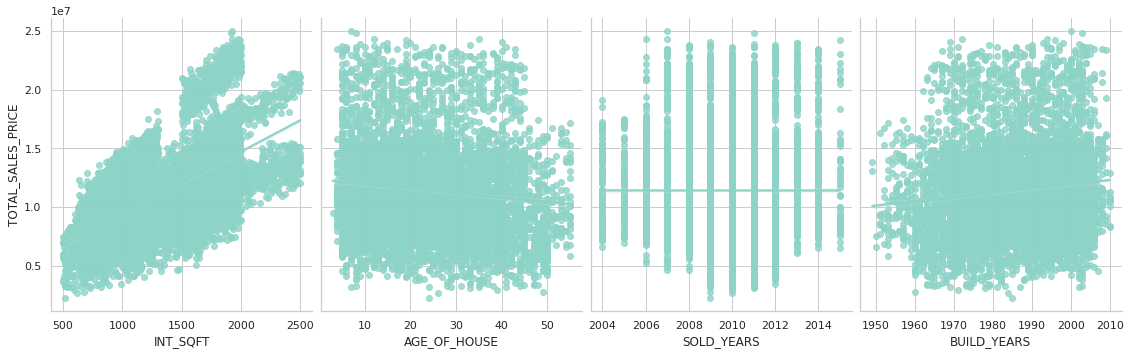

In [230]:
## THIS FEATURE ARE IN COINTIUS VARIBALE  FIRST CHECK RELATION
sns.set_theme(style="whitegrid", palette="Set3",)
sns.pairplot(data,x_vars=["INT_SQFT", "AGE_OF_HOUSE","SOLD_YEARS","BUILD_YEARS"], y_vars=["TOTAL_SALES_PRICE"],
             height=5,aspect=.8, kind="reg",)
plt.show()

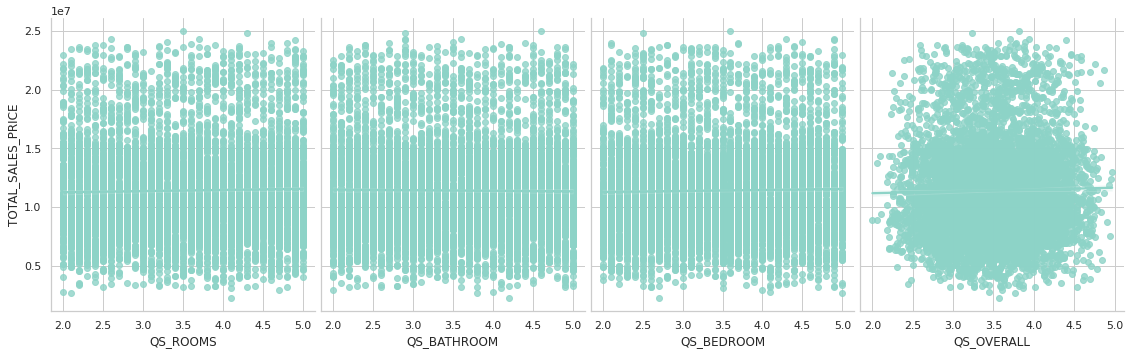

In [231]:
sns.pairplot(data,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["TOTAL_SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

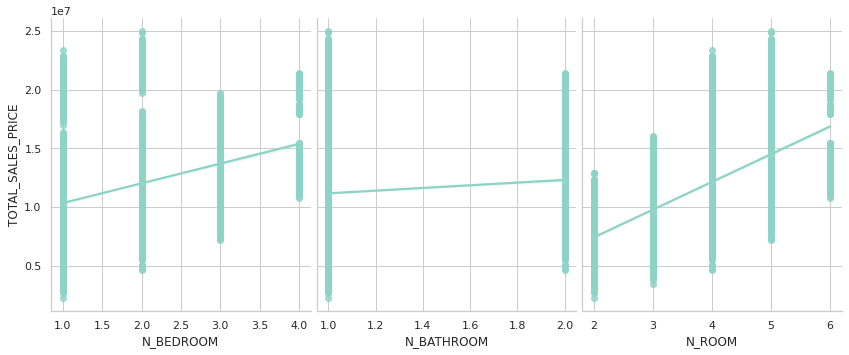

In [232]:
sns.pairplot(data,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["TOTAL_SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In [233]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'TOTAL_SALES_PRICE', 'BUILD_YEARS', 'SOLD_YEARS',
       'AGE_OF_HOUSE'],
      dtype='object')

# FROM REALTION BETWEEN TARGET VARIABLE

 ** THERE IS LINEAR RELATION BETWEEN TARGET ARE:**
   * INT_SQFT , N_BEDROM , N_ROOM,
     
  **NO LINEAR RELATION BETWWEN TARGET ARE:**
    
    * N_BATHROOM , QS_OVERALL ,QS_BATHROOM , QS_BEDROOM ,BUILD YEARS ,SOLD_YEARS , AGE_OF_HOUSE 
  

# ENCODING FOR CATEGORICAL FEATURES.

In [234]:
## IMPORT THE LIBARY FOR ENCODING 
#from sklearn.preprocessing import LabelEncoder
#lb=LabelEncoder()

In [235]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_SALES_PRICE,BUILD_YEARS,SOLD_YEARS,AGE_OF_HOUSE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,1967,2011,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,1995,2006,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,1992,2012,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,10063653,1988,2010,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,1979,2009,30


In [236]:
#data['PARK_FACIL']=lb.fit_transform(data['PARK_FACIL'])
#data['AREA']=lb.fit_transform(data['AREA'])
#data['BUILDTYPE']=lb.fit_transform(data['BUILDTYPE'])
#data['SALE_COND']=lb.fit_transform(data['SALE_COND'])
#data['UTILITY_AVAIL']=lb.fit_transform(data['UTILITY_AVAIL'])
#data['STREET']=lb.fit_transform(data['STREET'])
#data['MZZONE']=lb.fit_transform(data['MZZONE'])

In [237]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'TOTAL_SALES_PRICE', 'BUILD_YEARS', 'SOLD_YEARS',
       'AGE_OF_HOUSE'],
      dtype='object')

In [238]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [239]:
data.AREA = data.AREA.map({'Karapakkam':1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})
data.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

In [240]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [241]:
data.SALE_COND = data.SALE_COND.map({'Partial':1,"Family":2,"AbNormal":3,"Normal Sale":4,"AdjLand":5})
data.SALE_COND.unique()

array([3, 2, 1, 5, 4])

In [242]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [243]:
data.PARK_FACIL =data.PARK_FACIL.map({"No":0,"Yes":1})
data.PARK_FACIL.unique()

array([1, 0])

In [244]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewa'], dtype=object)

In [245]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({"ELO":1,"No Sewa":2,"No Sewer":3,"AllPub":4})
data.UTILITY_AVAIL.unique()

array([4, 1, 3, 2])

In [246]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [247]:
data.STREET = data.STREET.map({"No Access":1,"Paved":2,"Gravel":3})
data.STREET.unique()

array([2, 3, 1])

In [248]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [249]:
data.MZZONE = data.MZZONE.map({"A":1,"C":2,"I":3,"RH":4,"RL":5,'RM':6})
data.MZZONE.unique()

array([1, 4, 5, 3, 2, 6])

In [250]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [251]:
data.BUILDTYPE = data.BUILDTYPE.map({"House":0,"Others":1,"Commercial":2})
data.BUILDTYPE.unique()

array([2, 1, 0])

In [252]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,TOTAL_SALES_PRICE,BUILD_YEARS,SOLD_YEARS,AGE_OF_HOUSE
0,1,1004,131,1.0,1.0,3,3,1,2,4,2,1,4.0,3.9,4.9,4.330,8124400,1967,2011,44
1,6,1986,26,2.0,1.0,5,3,0,2,4,3,4,4.9,4.2,2.5,3.765,22781941,1995,2006,11
2,2,909,70,1.0,1.0,3,3,1,2,1,3,5,4.1,3.8,2.2,3.090,13672408,1992,2012,20
3,4,1855,14,3.0,2.0,5,2,0,1,3,2,3,4.7,3.9,3.6,4.010,10063653,1988,2010,22
4,1,1226,84,1.0,1.0,3,3,1,1,4,3,2,3.0,2.5,4.1,3.290,7717313,1979,2009,30


In [253]:
data.isna().sum()

AREA                 0
INT_SQFT             0
DIST_MAINROAD        0
N_BEDROOM            0
N_BATHROOM           0
N_ROOM               0
SALE_COND            0
PARK_FACIL           0
BUILDTYPE            0
UTILITY_AVAIL        0
STREET               0
MZZONE               0
QS_ROOMS             0
QS_BATHROOM          0
QS_BEDROOM           0
QS_OVERALL           0
TOTAL_SALES_PRICE    0
BUILD_YEARS          0
SOLD_YEARS           0
AGE_OF_HOUSE         0
dtype: int64

# SPLITTING DATA 

In [254]:
X= np.array(data.drop(['TOTAL_SALES_PRICE'],axis=1))
y= np.array(data['TOTAL_SALES_PRICE'])

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5331, 19), (1778, 19), (5331,), (1778,))

# MACHINE LEARNING MODEL

In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


**1st MODEL LINEAR REGRESSION MODEL**

In [258]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [259]:
lr.fit(X_train,Y_train)

LinearRegression()

In [260]:
yl_pred=lr.predict(X_test)

In [261]:
print(r2_score(Y_test,yl_pred))

0.8892946505436226


# 2nd MODEL IS RANDOM FOREST

In [262]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 5, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, Y_train);

# Use the forest's predict method on the test data
yr_pred = rf.predict(X_test)

In [263]:
print("Random forest Regressor model Rsquared metric",r2_score(Y_test,yr_pred))

Random forest Regressor model Rsquared metric 0.8690683603922671


# 3rd MODEL IS XGBOOST.

In [264]:
import xgboost as xg
# xg_model = XGBRegressor()
xg= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                )

In [265]:
xg.fit(X_train,Y_train)

[11:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=1000)

In [266]:
yx_pred=xg.predict(X_test)

In [267]:
print("XGBoost model Rsquared metric:",r2_score(Y_test,yx_pred))

XGBoost model Rsquared metric: 0.9934063889146453


# 4th MODEL IS ENSEMBLE TECHNIQUE.

In [268]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model.fit(X_train,Y_train)
ye_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(Y_test,ye_pred))

Ensemble Technique Rsquared metric 0.9846210369601057


# R_SQUARED_SCORES.


In [269]:
print("XGBoost model Rsquared metric:",r2_score(Y_test,yx_pred))
print("Ensemble Technique Rsquared metric:",r2_score(Y_test,ye_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(Y_test,yr_pred))
print("Linear Regg model Rsquared metric:",r2_score(Y_test,yl_pred))

XGBoost model Rsquared metric: 0.9934063889146453
Ensemble Technique Rsquared metric: 0.9846210369601057
Random forest Regressor model Rsquared metric: 0.8690683603922671
Linear Regg model Rsquared metric: 0.8892946505436226


# BEST MODEL

My XGBoost model give me the high accuracy which is close to 1

Followed by Ensemble Technique, RandomForest Regressor and Linear Regression. 

In [270]:
best_prediction = pd.DataFrame({
    'actual':Y_test,
    'predicted':yx_pred.flatten()
})

best_prediction.head()

,actual,predicted
0,10409495,10574910.0
1,14850662,14702122.0
2,14265012,14194338.0
3,14653003,14378272.0
4,7804245,7751069.0


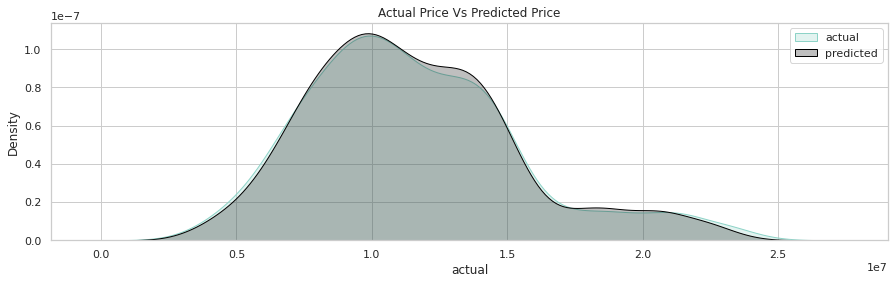

In [271]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=best_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=best_prediction, x='predicted', label='predicted', color="black", shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

# SUGGESTION TO BUYERS AND REAL ESTATE AGENTS.

*Listed houses in the dataset were built in between 1950 and 2010, and sold in 
between 2004 to 2014.

*Hose price was all time low during the year of 2008 and 2010 because of economical crisis in global market and natural calamities.

*Highest number of houses were sold in 2010-11. Houses are ranges in between INR 20Lakh to more than 2 Crore.

*Maximum number of rooms are 6, including 4 bedrooms and 2 bathrooms.

*Sale price column has some outliers, but we can't drop them as they are actual values and there contribution is unavoidable.

*House size and number of rooms are highly co-related to sales price. whereas, house age is negatively corelate to the sales price and built year is positive corelated.

*More number of houses were sold in Chrompet and Karapakkam. Most of these houses have single bedroom and of lower price than houses in T Nagar and Anna Nagar.

*Selling rate of commercially built apartments is low in compare to other building types. May be this because of their expensive nature.

*Frequent house purchasing activities were happened in the RH, RL and RM municipality zone. These areas have better access.




# Builders need to take care of these findings:

*It seems that the building type and available utilities effects the house price.

*Buildings with commercial build type and with all public facilities are very expensive.

*In Karapakkam the streets have limited or no access, which causes the house price to drop.

*Houses near to Gravel type of street come with highest price, followed by paved roads.

*Streets with no access gets less value.